# ANALYSIS OF CREDIT CARD DATASET

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

__El dataset contiene información sobre incumplimientos de pagos (conocidos como default) en 30.000 tarjetas de crédito de clientes de Taiwán entre Abril de 2005 y Septiembre de 2005. 
El objetivo de la competición es predecir si el cliente incumplirá el pago del siguiente mes en función de datos demográficos y datos históricos de pagos del propio cliente. 
El campo a predecir será por tanto el denominado como "default.payment.next.month" y la métrica con la que se evalúa cada fichero entregado es F1-Score__

1. Identify categorical and categorical features.
2. Identify client descriptor features and bank related features.
3. All the categories corresponds to the documented? add other class?
4. Explore dynamic range of numerical features.
5. Explore label balance.
6. Corralation between features and label

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
input_data_path = 'data/train.csv'
output_data_path = None


index_col = [0]
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'SEX',
            'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
            'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
labels = ['default.payment.next.month']

In [3]:
df = pd.read_csv(input_data_path, index_col=index_col)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,300000.0,1,1,1,45,-1,-1,-1,-1,-1,...,6666.0,8333.0,8333.0,0.0,24000.0,6666.0,10000.0,8333.0,15449.0,1
1,90000.0,2,2,1,48,0,0,0,0,0,...,47193.0,48105.0,49327.0,1723.0,2393.0,2090.0,2000.0,2000.0,1803.0,0
2,360000.0,2,3,2,38,-1,-1,-1,-2,-1,...,0.0,1444.0,-1382.0,3060.0,0.0,0.0,1444.0,1382.0,0.0,0
3,30000.0,2,2,1,30,-1,2,-1,-1,-1,...,0.0,1083.0,3395.0,0.0,1000.0,398.0,1083.0,3395.0,7383.0,0
4,150000.0,2,3,1,48,0,0,0,2,0,...,39922.0,40953.0,42136.0,2000.0,4000.0,0.0,2000.0,2000.0,2000.0,0


In [4]:
X = df[features].copy()
y= df[labels].copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29000 entries, 0 to 28999
Data columns (total 24 columns):
LIMIT_BAL                     29000 non-null float64
SEX                           29000 non-null int64
EDUCATION                     29000 non-null int64
MARRIAGE                      29000 non-null int64
AGE                           29000 non-null int64
PAY_0                         29000 non-null int64
PAY_2                         29000 non-null int64
PAY_3                         29000 non-null int64
PAY_4                         29000 non-null int64
PAY_5                         29000 non-null int64
PAY_6                         29000 non-null int64
BILL_AMT1                     29000 non-null float64
BILL_AMT2                     29000 non-null float64
BILL_AMT3                     29000 non-null float64
BILL_AMT4                     29000 non-null float64
BILL_AMT5                     29000 non-null float64
BILL_AMT6                     29000 non-null float64
PAY_AMT1  

In [21]:
categories = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

numerical = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
            'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

#### CATEGORIES EXPLORATION

In [7]:
def presence_of_category(df, column):
    presence_of_category = df[column].value_counts()/len(df)
    print('{0}\n'.format(presence_of_category.sort_index()))

for column in categories:
    presence_of_category(X, column)

1    0.396138
2    0.603862
Name: SEX, dtype: float64

0    0.000483
1    0.353414
2    0.466862
3    0.164103
4    0.004069
5    0.009345
6    0.001724
Name: EDUCATION, dtype: float64

0    0.001724
1    0.455759
2    0.531828
3    0.010690
Name: MARRIAGE, dtype: float64

-2    0.092000
-1    0.189207
 0    0.492172
 1    0.122345
 2    0.088862
 3    0.010621
 4    0.002586
 5    0.000862
 6    0.000379
 7    0.000310
 8    0.000655
Name: PAY_0, dtype: float64

-2    0.126034
-1    0.201483
 0    0.525069
 1    0.000931
 2    0.130345
 3    0.010828
 4    0.003310
 5    0.000862
 6    0.000414
 7    0.000690
 8    0.000034
Name: PAY_2, dtype: float64

-2    0.136241
-1    0.197586
 0    0.526172
 1    0.000138
 2    0.126862
 3    0.007931
 4    0.002552
 5    0.000724
 6    0.000793
 7    0.000897
 8    0.000103
Name: PAY_3, dtype: float64

-2    0.144931
-1    0.189379
 0    0.549379
 1    0.000069
 2    0.104586
 3    0.006000
 4    0.002276
 5    0.001172
 6    0.000172
 7    0.0

_nomenclature: 0 will represent always unknown category_

- SEX: categories are correct. More female presence (about 60%).
- EDUCATION: Undocumented category. 0 is a new category, so is unknown as 5 and 6. Put them all together as category 0. Graduate school and university are dominant. In total unknowns represents a 2%.
- MARRIAGE: Undocumented category. 0 is a new category, so it's unknown as 3. Put them all together as category 0. Is quite balaced. In total unknowns represents a 1.2%.
- PAY_N: Undocumented category. -2 is a new category, we have to options: We can figure out what it is or remove it. On all PAY_N columns represents between 10 and 16% which is a considerable amount. As is categored as a negative it can be consired as pay duly category, so substitude -2 by -1, or just consider that is a new unknown variable. Also, 0 is a new category, it's pretty clean that corresponds to category 1, that is documented and is missing. So we can replace 0 by 1. After this discussion the safest option is to convert 0 ==> 1, 2 ==> 0.

In [8]:
X.loc[(X['EDUCATION'] == 5) | (X['EDUCATION'] == 6), 'EDUCATION'] = 0
X.loc[(X['MARRIAGE'] == 3), 'MARRIAGE'] = 0

pay_n_columns = categories[3:]

for pay_column in pay_n_columns:
    X.loc[(X[pay_column] == 0), pay_column] = 1
    X.loc[(X[pay_column] == -2), pay_column] = 0

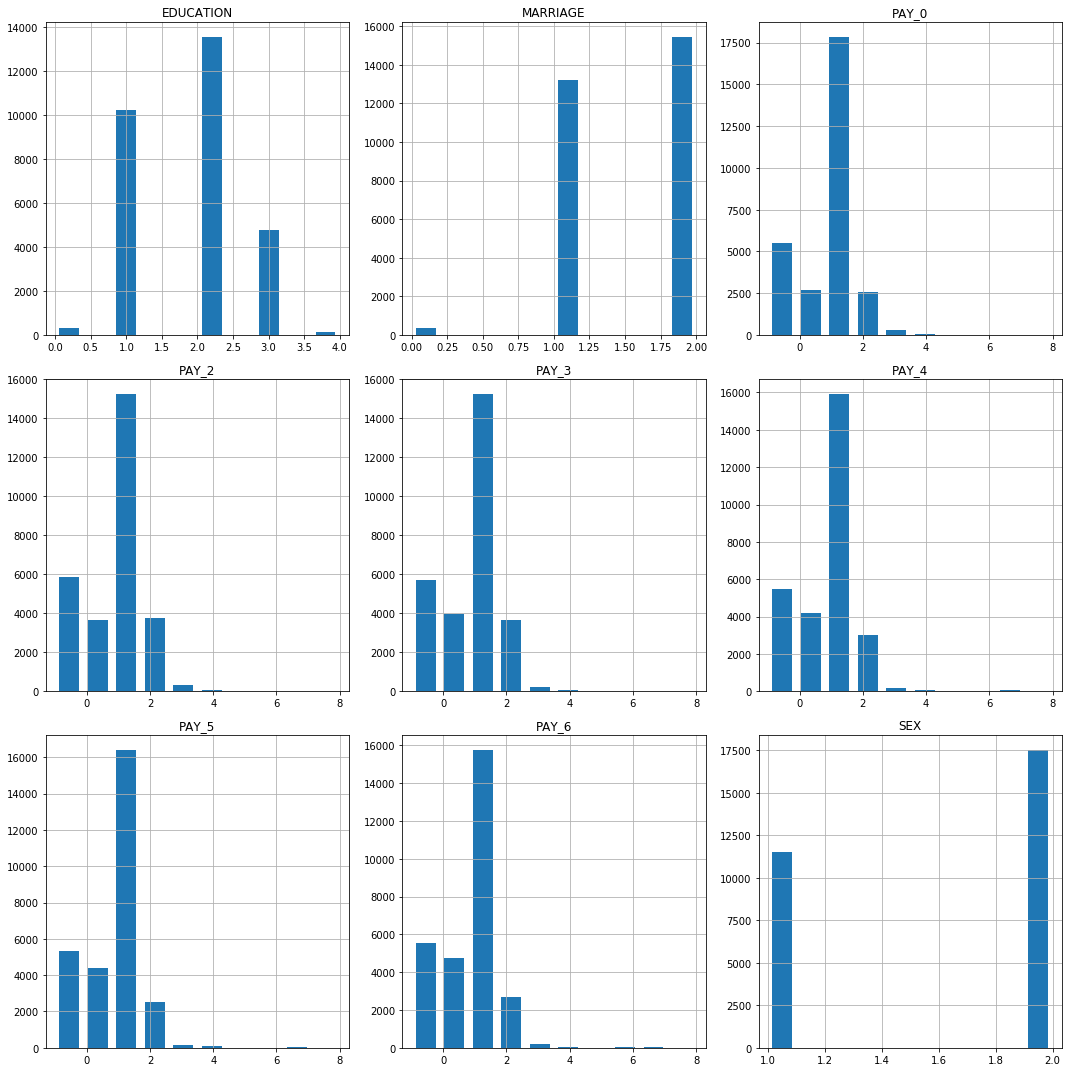

In [19]:
X[categories].hist(figsize=(15,15), rwidth=0.7)
plt.tight_layout()
plt.show()

In [22]:
X[numerical].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,29000.000000,29000.000000,29000.000000,29000.000000,2.900000e+04,29000.000000,29000.000000,29000.000000,29000.000000,2.900000e+04,29000.000000,29000.000000,29000.000000,29000.000000
mean,167433.782069,35.491241,51136.602517,49074.231310,4.694066e+04,43144.795310,40189.480724,38749.119448,5653.731069,5.929659e+03,5219.206724,4813.517793,4799.700724,5219.066931
std,129697.398166,9.230207,73474.536539,70982.971944,6.926064e+04,64168.203863,60625.599590,59372.108587,16591.601004,2.327732e+04,17538.709464,15544.667864,15337.748270,17828.678225
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3575.500000,2976.750000,2.670250e+03,2338.750000,1759.000000,1250.750000,1000.000000,8.330000e+02,390.000000,298.750000,249.000000,122.750000
50%,140000.000000,34.000000,22426.500000,21267.000000,2.011400e+04,19037.000000,18091.000000,17067.500000,2100.000000,2.009000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,66978.250000,63816.500000,5.997025e+04,54337.000000,50092.000000,49107.000000,5005.000000,5.000000e+03,4500.000000,4010.000000,4023.250000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


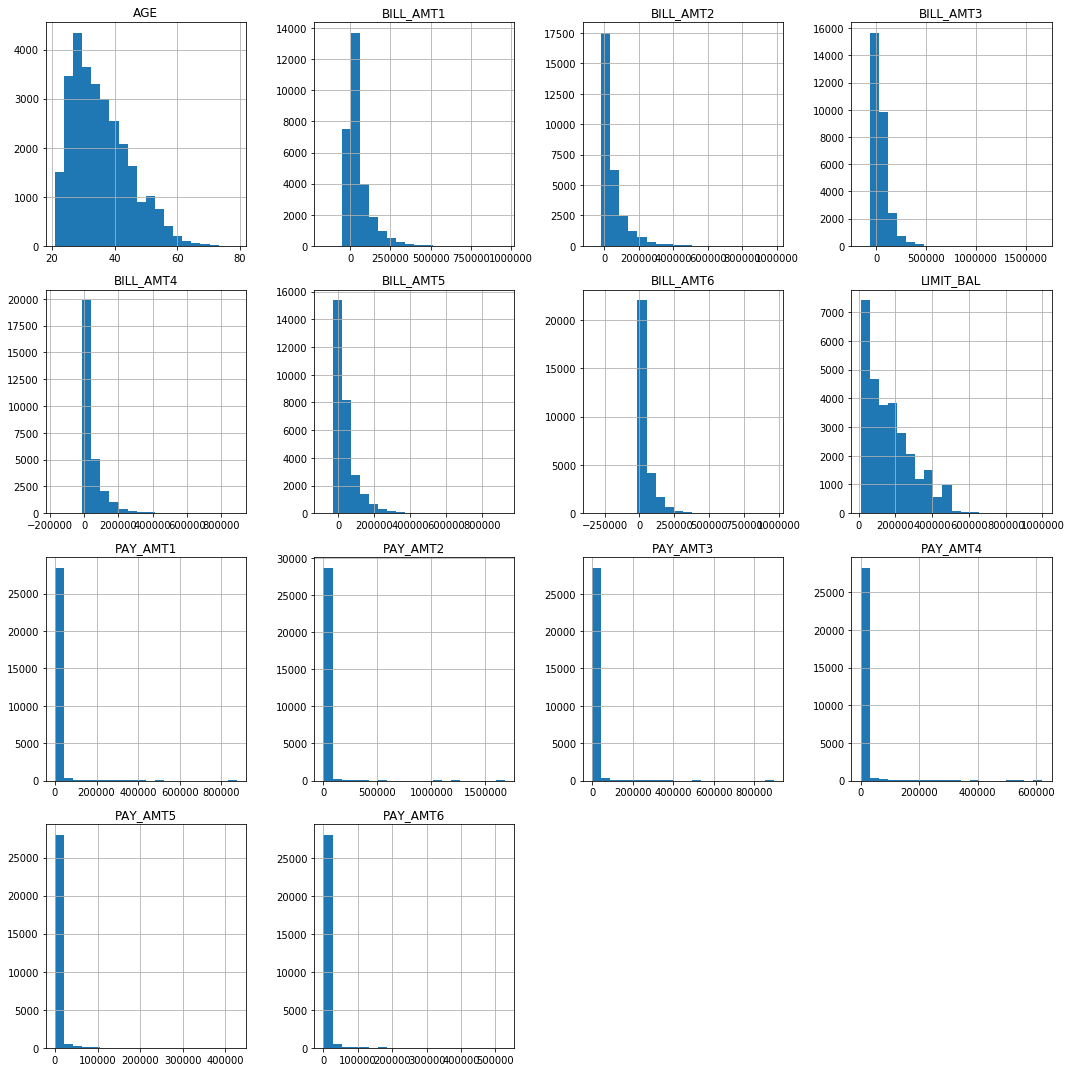

In [26]:
X[numerical].hist(figsize=(15,15), bins=20)
plt.tight_layout()
plt.show()

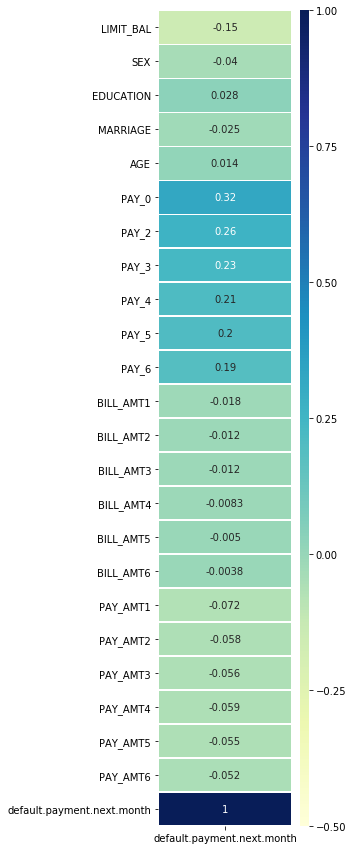

In [58]:
correlations = df.corr()[['default.payment.next.month']]
plt.figure(figsize = (3,15))
sns.heatmap(correlations, cmap="YlGnBu",  cbar_kws={"aspect":100}, linewidths=.5, annot=True,  vmin=-0.5, vmax=1)

In [60]:
'''
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
correlations = df.corr()[['default.payment.next.month']]
plt.figure(figsize = (3,15))
sns.heatmap(correlations, cmap="YlGnBu",  cbar_kws={"aspect":100}, linewidths=.5, annot=True,  vmin=-0.5, vmax=1)
'''

'\ndf[\'SE_MA_2\'] = 0\ndf.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , \'SE_MA_2\'] = 1 #married man\ndf.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , \'SE_MA_2\'] = 2 #single man\ndf.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , \'SE_MA_2\'] = 3 #divorced man\ndf.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , \'SE_MA_2\'] = 4 #married woman\ndf.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , \'SE_MA_2\'] = 5 #single woman\ndf.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , \'SE_MA_2\'] = 6 #divorced woman\ncorrelations = df.corr()[[\'default.payment.next.month\']]\nplt.figure(figsize = (3,15))\nsns.heatmap(correlations, cmap="YlGnBu",  cbar_kws={"aspect":100}, linewidths=.5, annot=True,  vmin=-0.5, vmax=1)\n'

In [ ]:
## create pipelines
# normalize numeric features
# encode categorical features

## analyze
# search for correlations

## imbalanced dataset?
